# We will now train a simple neural network: a perceptron that classifies images of handwritten digit
# Below we import necessary libraries and download the MNIST dataset, containing those images

In [2]:

import random
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
from sklearn import tree
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

# Read in the mnist dataset of digit images
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# Next, we will divide the data into a training set and test set, randomly selecting 5000 examples for training.

In [2]:
train_samples = 5000

# convert to numpy from pandas
X = np.array(X)
y = np.array(y)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=1000)

# Let's display some items in the dataset and their labels.

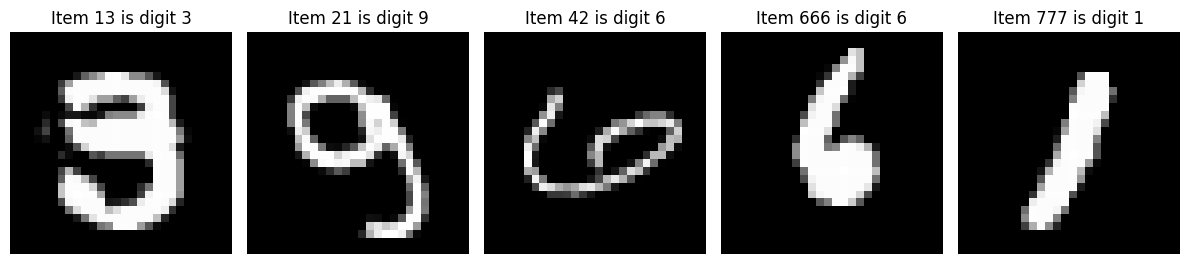

In [6]:
items = [13, 21, 42, 666, 777]

# create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 5, figsize=(12, 4))

for i, it in enumerate(items):
    # extract label and image, reshape image to 28x28
    img = np.array(X_train[it]).reshape(28, 28)
    
    # Display the image on the subplot axis
    axes[i].imshow(img, cmap='gray', vmin=0, vmax=255)
    axes[i].set_title(f"Item {it} is digit {y_train[it]}")
    axes[i].axis('off')  # hide axis ticks

plt.tight_layout()
plt.show()

# Let's see how a decision tree with 170 decision rules performs by training it and printing its accuracy.

In [5]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 200)	
clf = clf.fit(X_train, y_train)			
correct = 0						
for i in range(len(X_test)):	
  if clf.predict([X_test[i]]) == y_test[i]: 
      correct = correct + 1
  acc = [100.0* correct / len(X_test)]

print(f"acc={acc}")

acc=[77.3]


# Now let's try a simple neural network, a multi-layer perceptron with no hidden layers.

In [6]:
clf = MLPClassifier(hidden_layer_sizes=[], max_iter = 10000, activation = 'identity')
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.851


# We will add one hidden layer and expand the number of hidden units from 10 to 200 in intervals of 10. 
# We'll print the accuracy of each model given the number of hidden units.

In [7]:
for i in range(1,21):
  nhidden = i*10
  clf = MLPClassifier(hidden_layer_sizes=[nhidden], max_iter = 10000)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  print(nhidden, score)

10 0.399
20 0.841
30 0.842
40 0.842
50 0.854
60 0.874
70 0.851
80 0.86
90 0.855
100 0.862
110 0.889
120 0.892
130 0.886
140 0.894
150 0.898
160 0.91
170 0.899
180 0.912
190 0.905
200 0.898


# Now the model ia trained and should be able to recognize images.
# To see how a model varies across multiple runs, we check it ten times.

In [7]:
# retrain the model for the best hiddel layers choise - 180
nhidden = 180
clf = MLPClassifier(hidden_layer_sizes=[nhidden], max_iter = 10000)
clf.fit(X_train, y_train)
print('done...')

done...


In [14]:
items = [13, 21, 42, 666, 777]
results = []
for it in items:
    res = clf.predict([X_test[it]])
    results.append(res)
    print(f"model says that item {y_test[it]} is {res}")
   

model says that item 6 is ['6']
model says that item 3 is ['2']
model says that item 6 is ['6']
model says that item 4 is ['4']
model says that item 9 is ['9']


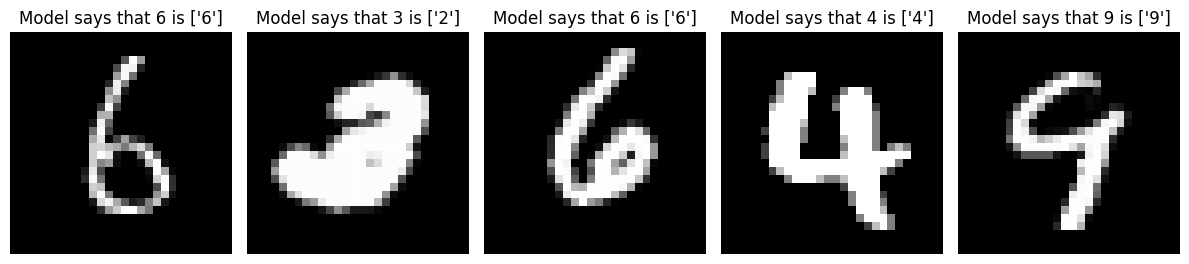

In [15]:
fig, axes = plt.subplots(1, 5, figsize=(12, 4))

for i, it in enumerate(items):
    # Extract label and image, reshape image to 28x28
    img = np.array(X_test[it]).reshape(28, 28)
    
    # Display the image on the subplot axis
    axes[i].imshow(img, cmap='gray', vmin=0, vmax=255)
    axes[i].set_title(f"Model says that {y_test[it]} is {results[i]}")
    axes[i].axis('off')  # Hide axis ticks

plt.tight_layout()
plt.show() 